In [1]:
import numpy as np
import matplotlib.pyplot as plt

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


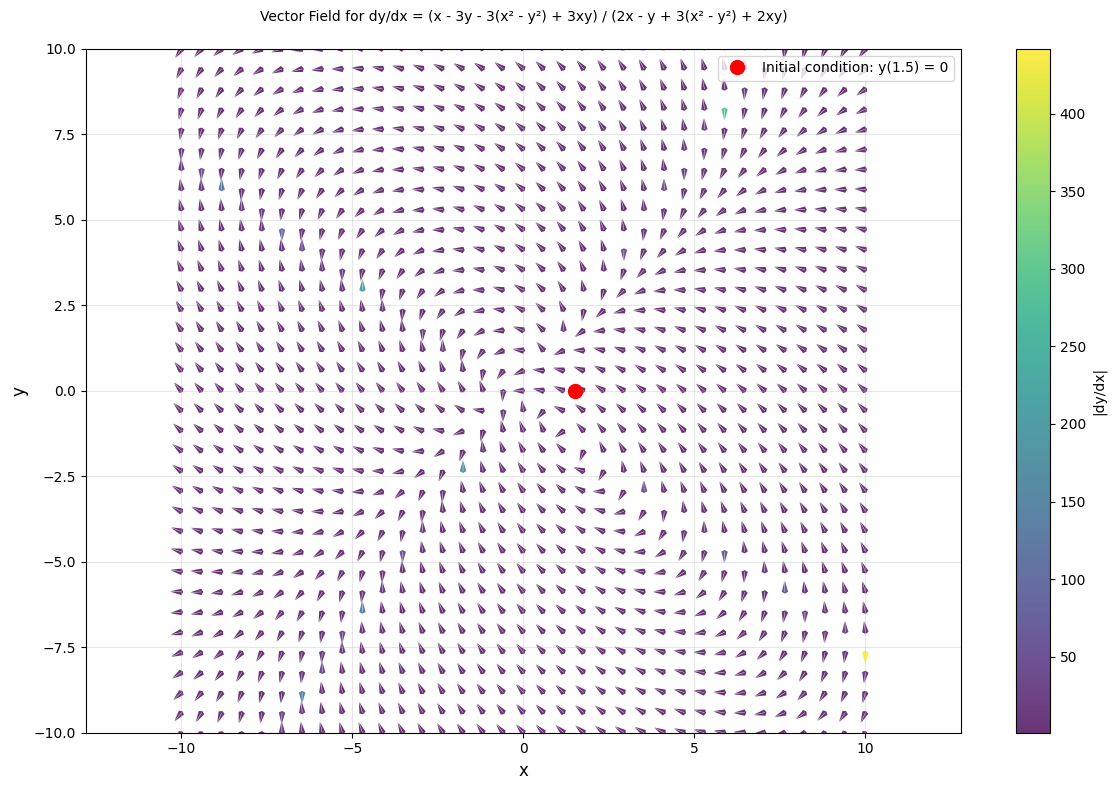

At the initial condition (x=1.5, y=0):
dy/dx = -0.5385


In [ ]:
# Define the differential equation dy/dx = f(x, y)
def f(x, y):
    numerator = x - 3*y - 3*(x**2 - y**2) + 3*x*y
    denominator = 2*x - y + 3*(x**2 - y**2) + 2*x*y
    
    # Handle division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        result = numerator / denominator
        
        # Handle both scalar and array cases
        if np.isscalar(result):
            if np.isnan(result) or np.isinf(result):
                result = 0
        else:
            result[np.isnan(result)] = 0  # Set NaN values to 0
            result[np.isinf(result)] = 0  # Set infinite values to 0
    
    return result

# Create a grid of points
x_min, x_max = -10, 10
y_min, y_max = -10, 10
x = np.linspace(x_min, x_max, 35)
y = np.linspace(y_min, y_max, 35)
X, Y = np.meshgrid(x, y)

# Calculate the slope at each point
DY_DX = f(X, Y)

# Calculate normalized direction vectors
# dx = 1, dy = dy/dx * dx = dy/dx
DX = np.ones_like(DY_DX)
DY = DY_DX

# Normalize the vectors for better visualization
magnitude = np.sqrt(DX**2 + DY**2)
magnitude[magnitude == 0] = 1

DX_norm = DX / magnitude
DY_norm = DY / magnitude

plt.figure(figsize=(12, 8))

# Plot the vector field
plt.quiver(X, Y, DX_norm, DY_norm, magnitude, 
           scale=20, scale_units='xy', angles='xy',
           cmap='viridis', alpha=0.8, width=0.004,
           headwidth=15, headlength=4, headaxislength=30,
           minlength=0.1)

plt.colorbar(label='|dy/dx|')

# Mark the initial condition
plt.plot(1.5, 0, 'ro', markersize=10, label='Initial condition: y(1.5) = 0')

# Add grid and labels
plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Vector Field for dy/dx = (x - 3y - 3(x² - y²) + 3xy) / (2x - y + 3(x² - y²) + 2xy)', 
          fontsize=10, pad=20)
plt.legend()

# Set equal aspect ratio for better visualization
plt.axis('equal')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()

x0, y0 = 1.5, 0
slope_at_initial = f(x0, y0)
print(f"At the initial condition (x={x0}, y={y0}):")
print(f"dy/dx = {slope_at_initial:.4f}")

In [13]:
import numpy as np
from scipy.optimize import fsolve, root
import matplotlib.pyplot as plt

def system_equations(vars):
    x, y = vars
    F1 = x - 3*y - 3*x**2 + 3*y**2 + 3*x*y
    F2 = 2*x - y + 3*x**2 - 3*y**2 + 2*x*y
    return [F1, F2]

def find_equilibrium_points():
    equilibrium_points = []
    
    initial_guesses = [
        (0, 0), (1, 1), (-1, -1), (1, -1), (-1, 1),
        (2, 0), (0, 2), (-2, 0), (0, -2),
        (0.5, 0.5), (-0.5, -0.5), (1.5, 0.5),
        (3, 1), (-3, -1), (0.1, 0.1)
    ]
    
    for guess in initial_guesses:
        try:
            # Use fsolve to find roots
            solution = fsolve(system_equations, guess, xtol=1e-12)
            
            # Verify the solution is actually a root
            residual = system_equations(solution)
            error = np.sqrt(residual[0]**2 + residual[1]**2)
            
            if error < 1e-10:
                # Check if this point is already in our list (avoid duplicates)
                is_duplicate = False
                for existing_point in equilibrium_points:
                    if np.sqrt((solution[0] - existing_point[0])**2 + 
                              (solution[1] - existing_point[1])**2) < 1e-8:
                        is_duplicate = True
                        break
                
                if not is_duplicate:
                    equilibrium_points.append(solution)
                    print(f"Equilibrium point found: ({solution[0]:.6f}, {solution[1]:.6f})")
                    print(f"  Verification: F1 = {residual[0]:.2e}, F2 = {residual[1]:.2e}")
                    print()
        
        except:
            continue
    
    return equilibrium_points

print("Searching for equilibrium points...")
print("=" * 50)
eq_points = find_equilibrium_points()

if len(eq_points) == 0:
    print("No equilibrium points found with the given initial guesses.")
    print("The system might not have equilibrium points, or they might be outside the search region.")
else:
    print(f"Found {len(eq_points)} equilibrium point(s):")
    for i, point in enumerate(eq_points):
        print(f"  Point {i+1}: ({point[0]:.6f}, {point[1]:.6f}) value : {system_equations(point)}")

Searching for equilibrium points...
Equilibrium point found: (0.000000, 0.000000)
  Verification: F1 = 0.00e+00, F2 = 0.00e+00

Equilibrium point found: (0.412478, 0.638639)
  Verification: F1 = 0.00e+00, F2 = 0.00e+00

Equilibrium point found: (-0.466121, -0.220889)
  Verification: F1 = -1.67e-16, F2 = 5.55e-17

Equilibrium point found: (1.386977, -1.417750)
  Verification: F1 = 1.78e-15, F2 = -8.88e-16

Found 4 equilibrium point(s):
  Point 1: (0.000000, 0.000000) value : [np.float64(0.0), np.float64(0.0)]
  Point 2: (0.412478, 0.638639) value : [np.float64(0.0), np.float64(0.0)]
  Point 3: (-0.466121, -0.220889) value : [np.float64(-1.6653345369377348e-16), np.float64(5.551115123125783e-17)]
  Point 4: (1.386977, -1.417750) value : [np.float64(1.7763568394002505e-15), np.float64(-8.881784197001252e-16)]


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


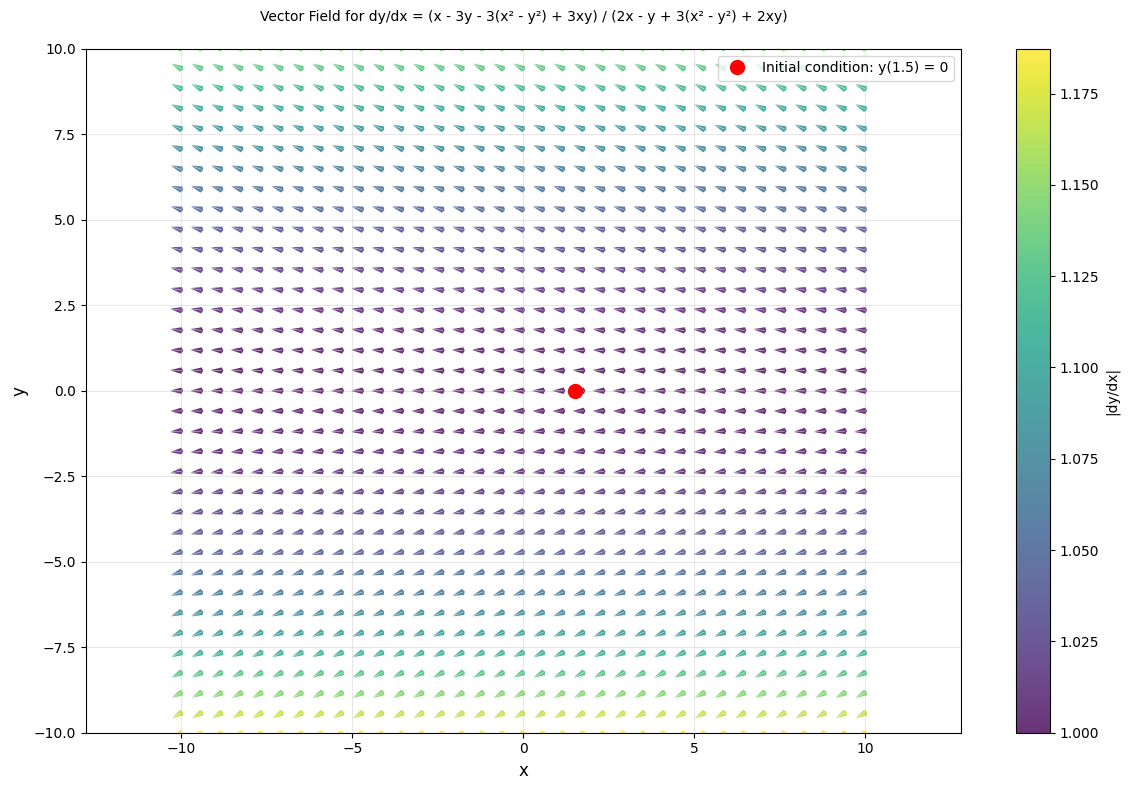

At the initial condition (x=1.5, y=0):
dy/dx = 0.0000


In [16]:
# Define the differential equation dy/dx = f(x, y)
def f(x, y):
    return 0.0004*y**2 - 0.06*y

# Create a grid of points
x_min, x_max = -10, 10
y_min, y_max = -10, 10
x = np.linspace(x_min, x_max, 35)
y = np.linspace(y_min, y_max, 35)
X, Y = np.meshgrid(x, y)

# Calculate the slope at each point
DY_DX = f(X, Y)

# Calculate normalized direction vectors
# dx = 1, dy = dy/dx * dx = dy/dx
DX = np.ones_like(DY_DX)
DY = DY_DX

# Normalize the vectors for better visualization
magnitude = np.sqrt(DX**2 + DY**2)
magnitude[magnitude == 0] = 1

DX_norm = DX / magnitude
DY_norm = DY / magnitude

plt.figure(figsize=(12, 8))

# Plot the vector field
plt.quiver(X, Y, DX_norm, DY_norm, magnitude, 
           scale=20, scale_units='xy', angles='xy',
           cmap='viridis', alpha=0.8, width=0.004,
           headwidth=15, headlength=4, headaxislength=30,
           minlength=0.1)

plt.colorbar(label='|dy/dx|')

# Mark the initial condition
plt.plot(1.5, 0, 'ro', markersize=10, label='Initial condition: y(1.5) = 0')

# Add grid and labels
plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Vector Field for dy/dx = (x - 3y - 3(x² - y²) + 3xy) / (2x - y + 3(x² - y²) + 2xy)', 
          fontsize=10, pad=20)
plt.legend()

# Set equal aspect ratio for better visualization
plt.axis('equal')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()

x0, y0 = 1.5, 0
slope_at_initial = f(x0, y0)
print(f"At the initial condition (x={x0}, y={y0}):")
print(f"dy/dx = {slope_at_initial:.4f}")